In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [17]:
frequency_category_table = df["category"].value_counts(ascending = False)
frequency_category_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

C:\Users\olivi\AppData\Local\Temp\ipykernel_38824\3119269130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ten_categories.index, y=top_ten_categories.values, palette="Set3")


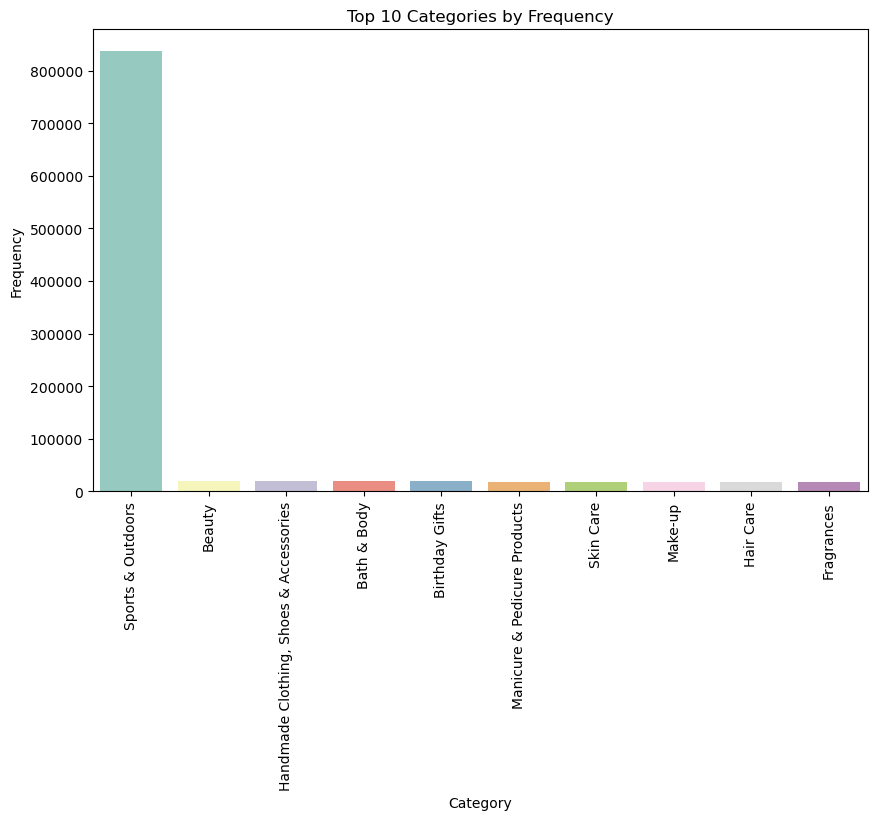

In [22]:
top_ten_categories = frequency_category_table.nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_categories.index, y=top_ten_categories.values, palette="Set3")
plt.title('Top 10 Categories by Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

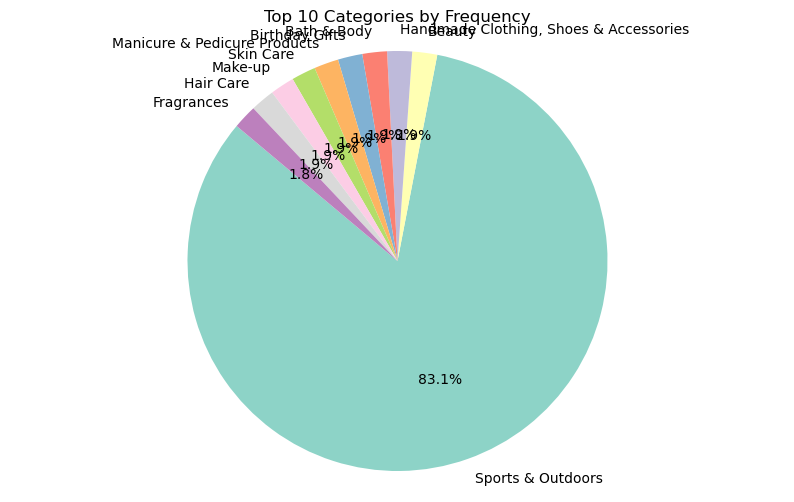

In [29]:
# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_ten_categories.values, labels=top_ten_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 10 Categories by Frequency')
plt.axis('equal') 
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [41]:
mean_price = df.price.mean()
mean_price

89.24380943923663

In [42]:
median_price = df.price.median()
median_price

19.09

In [43]:
mode = df.price.mode()
mode

0    9.99
Name: price, dtype: float64

In [35]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [ ]:
# Average price is 19.9 ; almost twice the mode (9.99)

In [44]:
standard_deviation = df.price.std()
standard_deviation

345.60886175352226

In [40]:
range = df.price.max() - df.price.min()
range

100000.0

In [46]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

inter_quartile_range = Q3 - Q1
inter_quartile_range

36.0

In [47]:
skewness_price = df.price.skew()
kurtosis_price = df.price.kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

<Axes: >

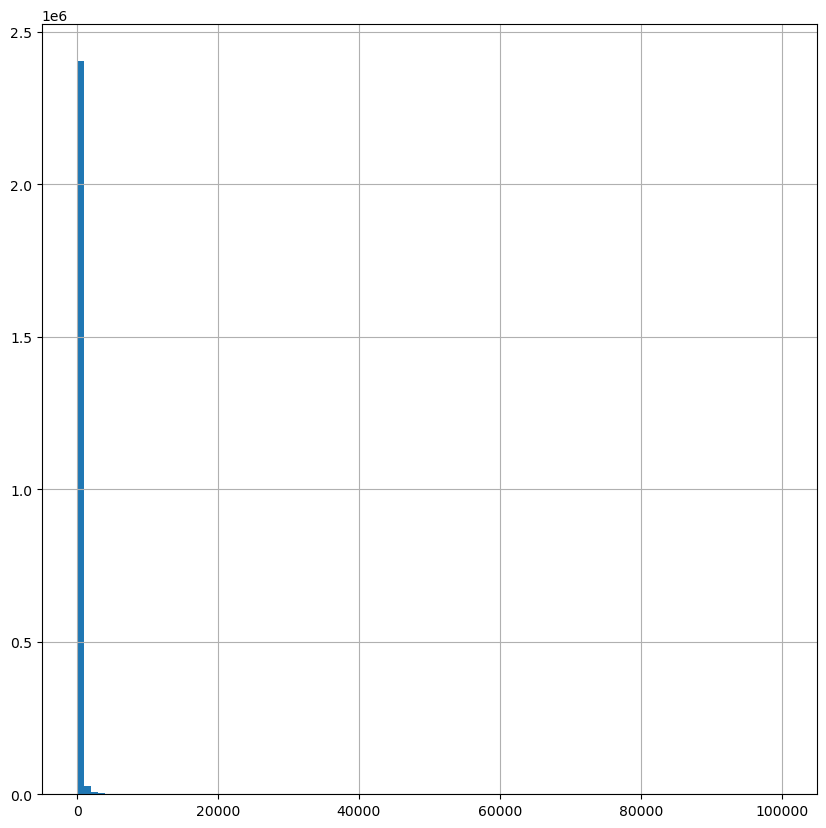

In [62]:
df.price.hist(figsize=(10, 10), bins=100, xlabelsize=10, ylabelsize=10)

# Since most of the prices are concentrated between 0 and 100, histogram is heavily skewed and hard to read
# We could use bining to make it more readable ; and remove outliers or limit the x-axis range to a few thousands

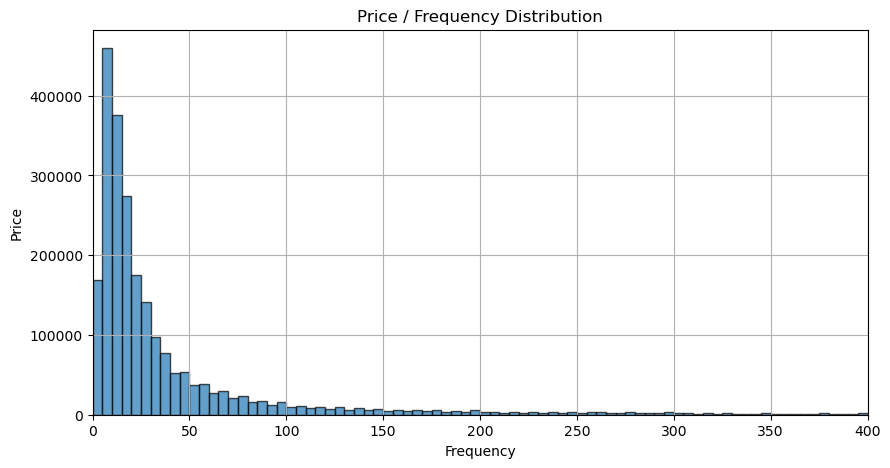

In [83]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=20000, edgecolor='k', alpha=0.7)
plt.title('Price / Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.xlim(0, 400)
plt.grid(True)
plt.show()

# Histogram is now more readable, when reducing the x-axis to 0-400$ and binning to 20,000

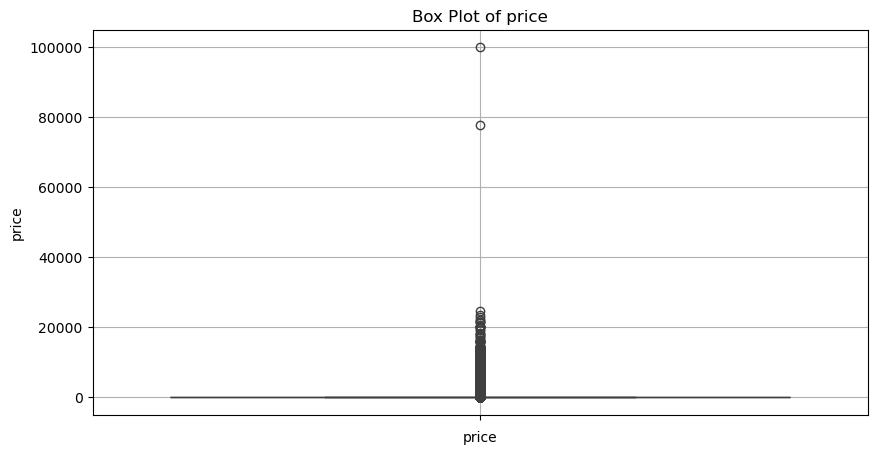

In [85]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid(True)
plt.show()

# We can highlight the outliers using the boxplot (one product cost up to $100.000)

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [87]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [88]:
df.stars.mean()

2.152836472966065

In [89]:
df.stars.median()

0.0

In [90]:
df.stars.mode()

0    0.0
Name: stars, dtype: float64

In [91]:
df.stars.value_counts()

# The immense majority ofg the reviews are 0 starts, then 5 stars, then 4 stars, then 3 stars, then 1 star, and finally 2 stars

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [92]:
standard_deviation = df.stars.std()
standard_deviation

# There is quite a wide variation of customer feedbacks, with a standard deviation of 2.19

2.1948653785054697

In [93]:
range = df.stars.max() - df.price.min()
range

5.0

In [94]:
Q1 = df.stars.quantile(0.25)
Q3 = df.stars.quantile(0.75)

inter_quartile_range = Q3 - Q1
inter_quartile_range

4.4

In [95]:
skewness_stars = df.stars.skew()
kurtosis_stars = df.stars.kurtosis()

skewness_stars, kurtosis_stars

# Distribution is almost symmetrical ; negative kurtosis indicates that the distribution is flatter than a normal distribution

(0.08120735761080985, -1.9260061280432985)

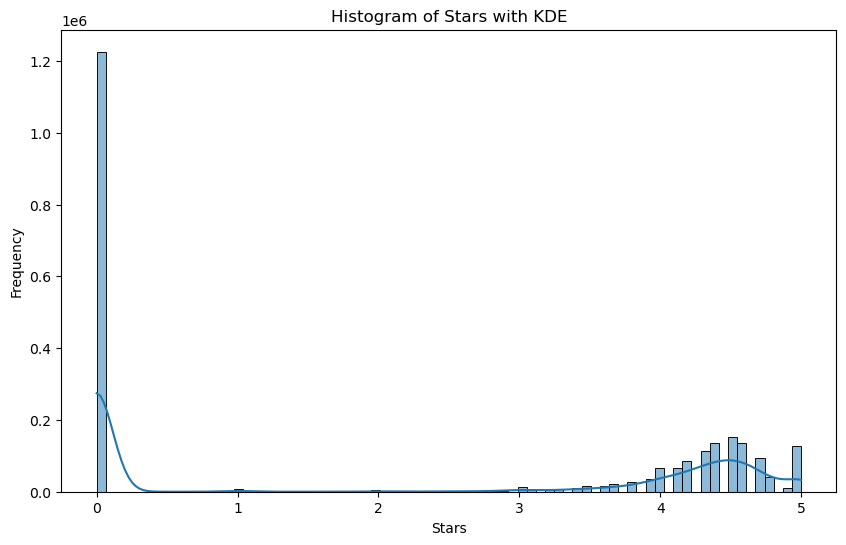

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], kde=True)
plt.title('Histogram of Stars with KDE')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

# A great majority of the reviews are 0 stars, with a few 5 stars reviews
